In [1]:
import pandas as pd

from data_utils.csv_utils import read_timeseries_csv
from data_utils.preprocessing import resample_timeseries_dataframe

In [2]:
df = read_timeseries_csv("./examples/sample_data/multivar_data/multivar_example.csv")
df.shape

(40320, 2)

In [3]:
df.head()

,cpu_usage_percentage,mem_usage_percentage
timestamp,,
2023-11-20 00:00:22,0.127510,0.150008
2023-11-20 00:00:52,0.153516,0.110194
2023-11-20 00:01:22,0.240867,0.083464
2023-11-20 00:01:52,0.354421,0.102289
2023-11-20 00:02:22,0.258880,0.096221


<Figure size 1000x600 with 0 Axes>

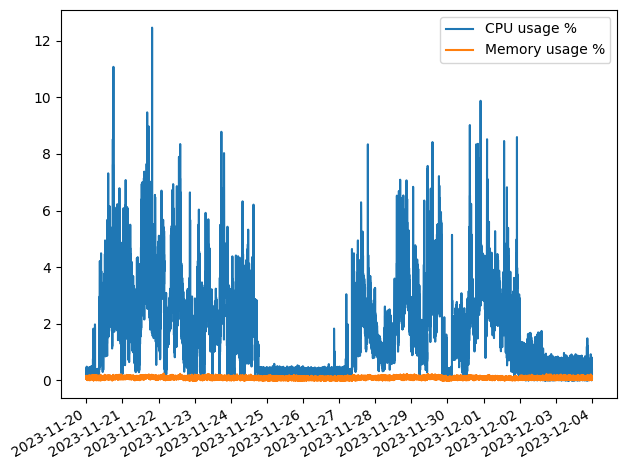

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10,6))

fig, ax = plt.subplots()
ax.plot(df["cpu_usage_percentage"], label="CPU usage %")
ax.plot(df["mem_usage_percentage"], label="Memory usage %")

# Set format for the date axis
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# df["cpu_usage_percentage"].plot()

<Axes: >

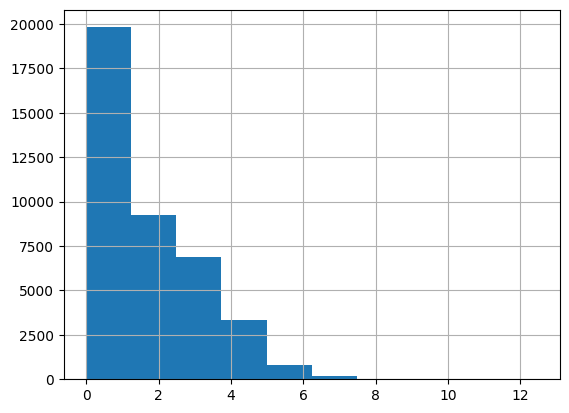

In [6]:
df["cpu_usage_percentage"].hist()

In [7]:
# df["mem_usage_percentage"].plot()

<Axes: >

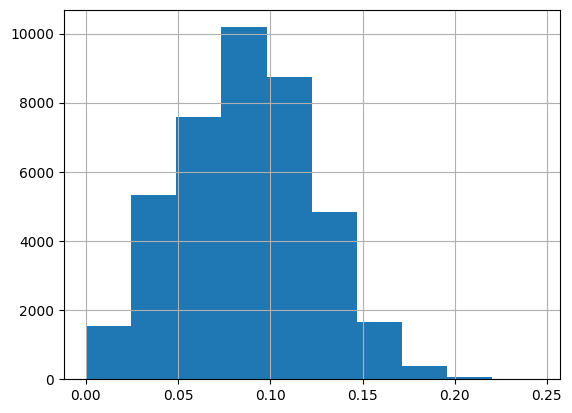

In [8]:
df["mem_usage_percentage"].hist()

In [9]:
df = resample_timeseries_dataframe(df, step="5min")
df.shape

(4032, 2)

In [10]:
df.head()

,cpu_usage_percentage,mem_usage_percentage
timestamp,,
2023-11-20 00:00:22,0.219111,0.105414
2023-11-20 00:05:22,0.270201,0.073452
2023-11-20 00:10:22,0.236511,0.120157
2023-11-20 00:15:22,0.274957,0.087303
2023-11-20 00:20:22,0.221884,0.097815


<Axes: xlabel='timestamp'>

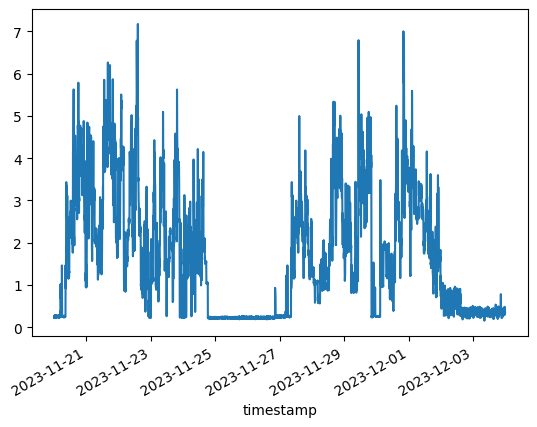

In [11]:
df["cpu_usage_percentage"].plot()

<Axes: xlabel='timestamp'>

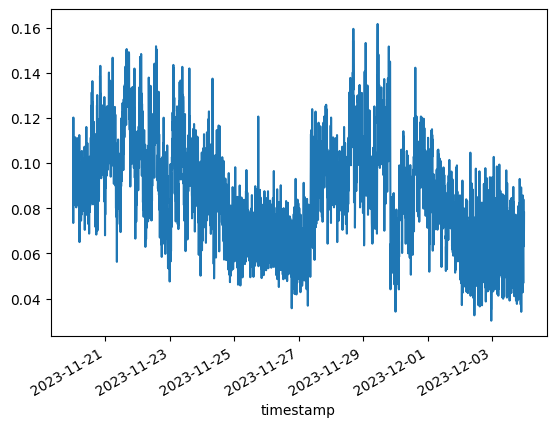

In [12]:
df["mem_usage_percentage"].plot()

<Figure size 1000x600 with 0 Axes>

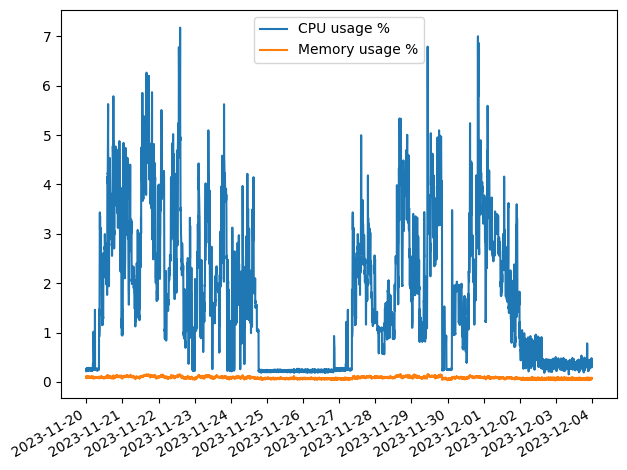

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10,6))

fig, ax = plt.subplots()
ax.plot(df["cpu_usage_percentage"], label="CPU usage %")
ax.plot(df["mem_usage_percentage"], label="Memory usage %")

# Set format for the date axis
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.tight_layout()
plt.show()

In [14]:
from data_utils.stats_tests import (
    is_stationary_timeseries,
    calculate_min_required_diff_order,
)

In [15]:
is_stationary_timeseries(df["cpu_usage_percentage"], method="kpss")

False

In [16]:
is_stationary_timeseries(df["cpu_usage_percentage"], method="adf")

True

In [17]:
is_stationary_timeseries(df["mem_usage_percentage"], method="kpss")

False

In [18]:
is_stationary_timeseries(df["mem_usage_percentage"], method="adf")

True

In [19]:
calculate_min_required_diff_order(df, method="kpss")

1

In [20]:
from data_utils.stats_tests import (
    calculate_cross_correlation,
    calculate_cointegration,
    are_cointegrated_timeseries,
    calculate_granger_causality_matrix,
)

In [21]:
calculate_cointegration(
    df["cpu_usage_percentage"],
    df["mem_usage_percentage"],
)

,trace_val,crit_val_90_conf,crit_val_95_conf,crit_val_99_conf
0,118.301422,10.4741,12.3212,16.364


In [22]:
are_cointegrated_timeseries(
    df["cpu_usage_percentage"],
    df["mem_usage_percentage"],
)

True

In [23]:
from data_utils.preprocessing import difference_timeseries

In [24]:
diffed_cpu_usage, cpu_usage_recovery_val = difference_timeseries(df["cpu_usage_percentage"])
df["cpu_usage_percentage"] = diffed_cpu_usage

df.head()

,cpu_usage_percentage,mem_usage_percentage
timestamp,,
2023-11-20 00:00:22,NaN,0.105414
2023-11-20 00:05:22,0.051091,0.073452
2023-11-20 00:10:22,-0.033690,0.120157
2023-11-20 00:15:22,0.038446,0.087303
2023-11-20 00:20:22,-0.053073,0.097815


In [25]:
diffed_mem_usage, mem_usage_recovery_val = difference_timeseries(df["mem_usage_percentage"])
df["mem_usage_percentage"] = diffed_mem_usage

df.head()

,cpu_usage_percentage,mem_usage_percentage
timestamp,,
2023-11-20 00:00:22,NaN,NaN
2023-11-20 00:05:22,0.051091,-0.031962
2023-11-20 00:10:22,-0.033690,0.046705
2023-11-20 00:15:22,0.038446,-0.032854
2023-11-20 00:20:22,-0.053073,0.010512


In [26]:
df[1:].head()

,cpu_usage_percentage,mem_usage_percentage
timestamp,,
2023-11-20 00:05:22,0.051091,-0.031962
2023-11-20 00:10:22,-0.033690,0.046705
2023-11-20 00:15:22,0.038446,-0.032854
2023-11-20 00:20:22,-0.053073,0.010512
2023-11-20 00:25:22,0.055513,-0.005792


<Figure size 1000x600 with 0 Axes>

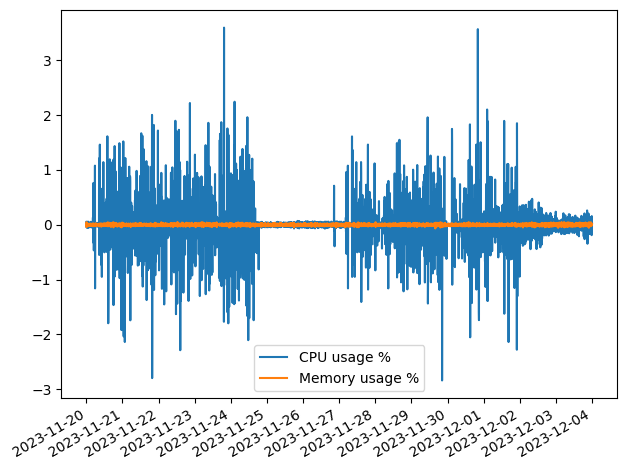

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10,6))

fig, ax = plt.subplots()
ax.plot(df[1:]["cpu_usage_percentage"], label="CPU usage %")
ax.plot(df[1:]["mem_usage_percentage"], label="Memory usage %")

# Set format for the date axis
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.tight_layout()
plt.show()

In [28]:
cross_corr_cpu_to_mem = calculate_cross_correlation(
    df[1:]["cpu_usage_percentage"],
    df[1:]["mem_usage_percentage"],
    100,
)

cross_corr_cpu_to_mem

,cross_correlation_coeff
lag,
0,0.181240
1,-0.049171
2,0.008877
3,-0.004061
4,-0.008963
...,...
95,-0.001927
96,0.002055
97,-0.010594


<Axes: xlabel='lag'>

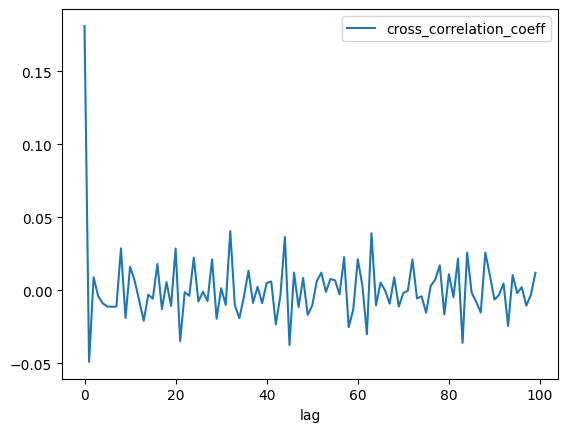

In [29]:
cross_corr_cpu_to_mem.plot()

In [30]:
cross_corr_mem_to_cpu = calculate_cross_correlation(
    df[1:]["mem_usage_percentage"],
    df[1:]["cpu_usage_percentage"],
    100,
)

cross_corr_mem_to_cpu

,cross_correlation_coeff
lag,
0,0.181240
1,0.004651
2,-0.000353
3,-0.022444
4,0.026312
...,...
95,-0.009264
96,0.000135
97,0.001125


<Axes: xlabel='lag'>

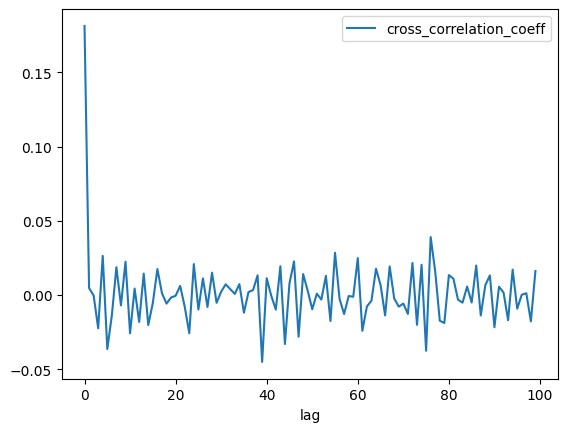

In [31]:
cross_corr_mem_to_cpu.plot()

In [32]:
calculate_granger_causality_matrix(
    df[1:],  # exclude the first row with NaNs created by differencing
    6,
)
        

/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,cpu_usage_percentage,mem_usage_percentage
column_name,,
cpu_usage_percentage,1.0000,0.0
mem_usage_percentage,0.4687,1.0


In [33]:
cpu_to_mem_caus_list = [
    calculate_granger_causality_matrix(
        df[1:],  # exclude the first row with NaNs created by differencing
        x,
    )["mem_usage_percentage"].iloc[0]
    for x in range(1, 101)
]

/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-pack

In [34]:
from forecasting_models.general_plotter import GeneralPlotter

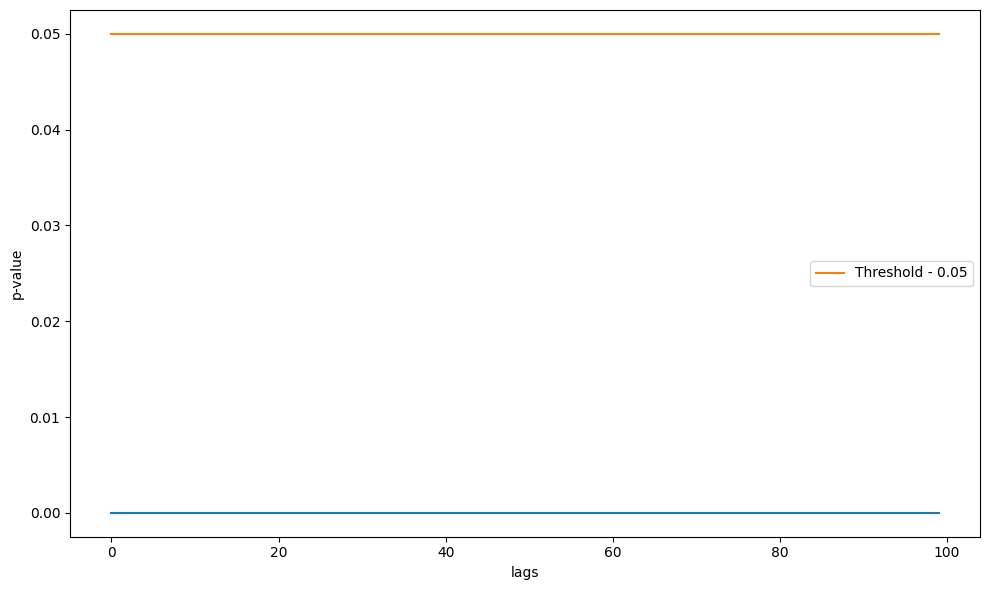

In [35]:
GeneralPlotter.plot_single_series(
    pd.Series(cpu_to_mem_caus_list),
    threshold_list=[0.05],
    axis_labels=("lags", "p-value"),
)

In [36]:
mem_to_cpu_caus_list = [
    calculate_granger_causality_matrix(
        df[1:],  # exclude the first row with NaNs created by differencing
        x,
    )["cpu_usage_percentage"].iloc[1]
    for x in range(1, 101)
]

/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/mlassak/.local/share/virtualenvs/anomaly-detection-JFtLwx1d/lib64/python3.10/site-pack

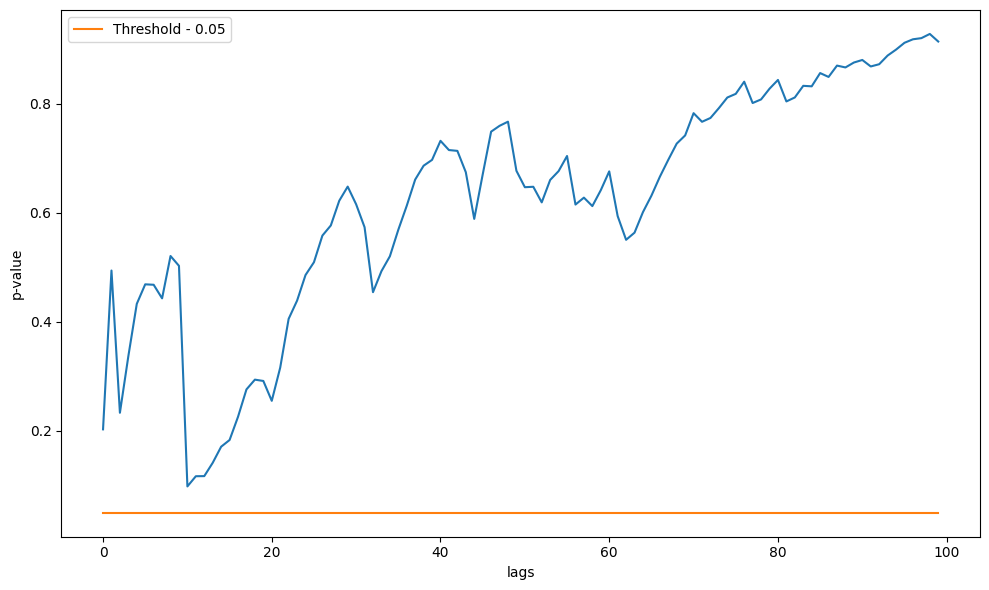

In [37]:
GeneralPlotter.plot_single_series(
    pd.Series(mem_to_cpu_caus_list),
    threshold_list=[0.05],
    axis_labels=("lags", "p-value"),
)

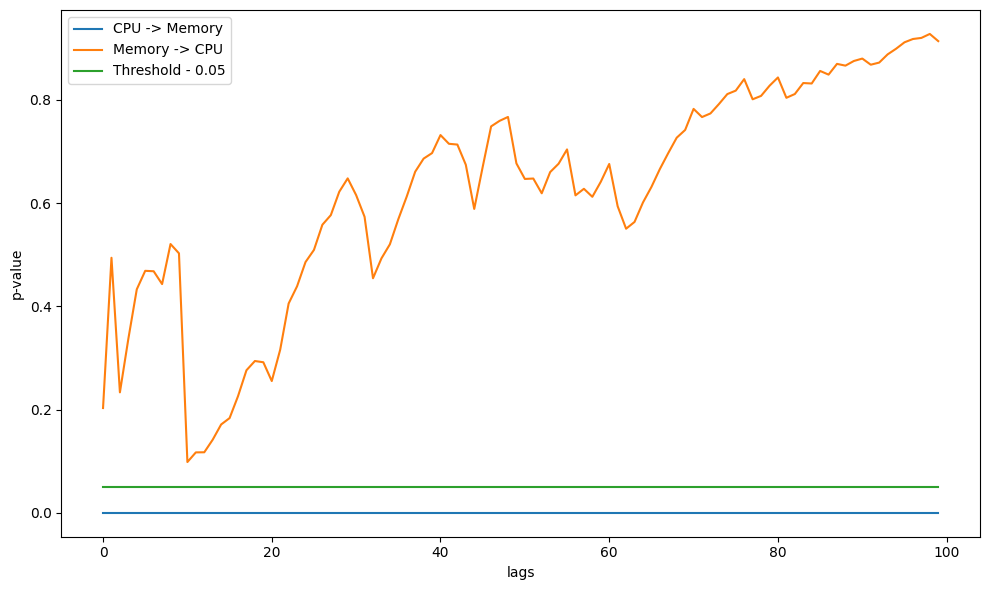

In [38]:
GeneralPlotter.plot_two_series(
    pd.Series(cpu_to_mem_caus_list),
    pd.Series(mem_to_cpu_caus_list),
    [0.05],
    axis_labels=("lags", "p-value"),
    plot_labels=("CPU -> Memory", "Memory -> CPU")
)